In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Use numpy to convert to arrays
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dfplaces= pd.read_csv('PLACES__Local_Data_for_Better_Health__Census_Tract_Data_2021_release.csv' ,dtype={"LocationName":"string"})

In [3]:
dfadi= pd.read_csv('US_2019_ADI_Census Block Group_v3.1.txt',dtype={"FIPS":"string"})


In [5]:
dfadi.applymap(type).eq(str).all()

Unnamed: 0      False
GISJOIN          True
FIPS             True
ADI_NATRANK      True
ADI_STATERNK     True
dtype: bool

In [6]:
dfadi['ADI_NATRANK'].nunique()

105

In [7]:
dfadi=dfadi[dfadi['ADI_NATRANK'].str.contains("GQ") == False]
dfadi=dfadi[dfadi['ADI_NATRANK'].str.contains("PH") == False]
dfadi=dfadi[dfadi['ADI_NATRANK'].str.contains("GQ-PH") == False]
dfadi=dfadi[dfadi['ADI_NATRANK'].str.contains("QDI") == False]
dfadi=dfadi[dfadi['ADI_NATRANK'].str.contains("NONE") == False]

In [8]:
dfadi['ADI_NATRANK']=dfadi['ADI_NATRANK'].astype(float)

In [9]:
dfadi['Census_Tract'] = dfadi['FIPS'].str[:-1]

In [10]:
dfadi1 = dfadi.groupby('Census_Tract', as_index=False).mean()

In [11]:
dfadi1=dfadi1[['Census_Tract','ADI_NATRANK']]

In [12]:
dfadi1

,Census_Tract,ADI_NATRANK
0,01001020100,70.500000
1,01001020200,85.000000
2,01001020300,73.000000
3,01001020400,64.250000
4,01001020500,48.333333
...,...,...
72609,72153750501,88.666667
72610,72153750502,84.500000
72611,72153750503,92.500000
72612,72153750601,87.000000


In [13]:
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Arthritis among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Sleeping less than 7 hours among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Obesity among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Diagnosed diabetes among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("High blood pressure among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Current smoking among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("No leisure-time physical activity among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Current asthma among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("High cholesterol among adults aged >=18 years who have been screened in the past 5 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Stroke among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("All teeth lost among adults aged >=65 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Physical health not good for >=14 days among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Mental health not good for >=14 days among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Fair or poor self-rated health status among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Chronic kidney disease among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Binge drinking among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Depression among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Coronary heart disease among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["Measure"].str.contains("Chronic obstructive pulmonary disease among adults aged >=18 years") == False]
dfplaces = dfplaces[dfplaces["MeasureId"].str.contains("CANCER") == False]


In [14]:
dfplaces=dfplaces.drop(['Category','StateAbbr','Low_Confidence_Limit','High_Confidence_Limit','TotalPopulation','CategoryID','MeasureId','Short_Question_Text','StateDesc','CountyName','CountyFIPS','Geolocation','DataValueTypeID','DataSource','Data_Value_Unit','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','LocationID'],axis=1)

In [15]:
dfplaces['Measure'].value_counts()


Visits to dentist or dental clinic among adults aged >=18 years                                                                                                                                   72337
Cervical cancer screening among adult women aged 21-65 years                                                                                                                                      72320
Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years                                                                                                              72305
Mammography use among women aged 50-74 years                                                                                                                                                      72253
Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening                                  72193


In [15]:
dfplaces.nunique()

Year                2
LocationName    72337
Measure             9
Data_Value        945
dtype: int64

In [16]:
dfplaces.rename(columns={'LocationName':'Census_Tract'}, inplace=True)

In [17]:
dfdentist = dfplaces[dfplaces["Measure"].str.contains("Visits to dentist or dental clinic among adults aged >=18 years") == True]
dfcervicalcancer = dfplaces[dfplaces["Measure"].str.contains("Cervical cancer screening among adult women aged 21-65 years") == True]
dfcolon = dfplaces[dfplaces["Measure"].str.contains("Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years") == True]
dfmammography = dfplaces[dfplaces["Measure"].str.contains("Mammography use among women aged 50-74 years") == True]
dfmenprevent = dfplaces[dfplaces["Measure"].str.contains("Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening") == True]
dfwonmenprevent = dfplaces[dfplaces["Measure"].str.contains("Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years") == True]
dfinsurance = dfplaces[dfplaces["Measure"].str.contains("Current lack of health insurance among adults aged 18-64 years") == True]
dfroutine = dfplaces[dfplaces["Measure"].str.contains("Visits to doctor for routine checkup within the past year among adults aged >=18 years") == True]
dfcholesterol = dfplaces[dfplaces["Measure"].str.contains("Cholesterol screening among adults aged >=18 years") == True]


In [18]:
dfcolon

,Year,Census_Tract,Measure,Data_Value
552,2018,01055001700,"Fecal occult blood test, sigmoidoscopy, or col...",64.7
612,2018,01037961200,"Fecal occult blood test, sigmoidoscopy, or col...",63.9
653,2018,01031010300,"Fecal occult blood test, sigmoidoscopy, or col...",68.7
673,2018,01001020400,"Fecal occult blood test, sigmoidoscopy, or col...",74.3
706,2018,01049960400,"Fecal occult blood test, sigmoidoscopy, or col...",64.3
...,...,...,...,...
2125499,2018,55139002900,"Fecal occult blood test, sigmoidoscopy, or col...",64.6
2125514,2018,56015957800,"Fecal occult blood test, sigmoidoscopy, or col...",54.5
2125532,2018,55127000901,"Fecal occult blood test, sigmoidoscopy, or col...",70.0
2125533,2018,55131410100,"Fecal occult blood test, sigmoidoscopy, or col...",73.8


In [19]:
dfdentist.rename(columns={"Data_Value":"Visits to dentist or dental clinic among adults aged >=18 years"}, inplace=True)
dfcervicalcancer.rename(columns={"Data_Value":"Cervical cancer screening among adult women aged 21-65 years"}, inplace=True)
dfcolon.rename(columns={"Data_Value":"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years"}, inplace=True)
dfmammography.rename(columns={"Data_Value":"Mammography use among women aged 50-74 years"}, inplace=True)
dfmenprevent.rename(columns={"Data_Value":"Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening"}, inplace=True)
dfwonmenprevent.rename(columns={"Data_Value":"Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years"}, inplace=True)
dfinsurance.rename(columns={"Data_Value":"Current lack of health insurance among adults aged 18-64 years"}, inplace=True)
dfroutine.rename(columns={"Data_Value":"Visits to doctor for routine checkup within the past year among adults aged >=18 years"}, inplace=True)
dfcholesterol.rename(columns={"Data_Value":"Cholesterol screening among adults aged >=18 years"}, inplace=True)

/var/folders/sj/3ktmcxh14mv3tnqrjdg9njyr0000gn/T/ipykernel_10811/879005752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdentist.rename(columns={"Data_Value":"Visits to dentist or dental clinic among adults aged >=18 years"}, inplace=True)
/var/folders/sj/3ktmcxh14mv3tnqrjdg9njyr0000gn/T/ipykernel_10811/879005752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcervicalcancer.rename(columns={"Data_Value":"Cervical cancer screening among adult women aged 21-65 years"}, inplace=True)
/var/folders/sj/3ktmcxh14mv3tnqrjdg9njyr0000gn/T/ipykernel_10811/879005752.py:3: SettingWithCopyWarning: 
A value is trying to

In [20]:
dfmerge=pd.merge(dfdentist,dfcervicalcancer, on="Census_Tract",how='outer')
dfmerge1=pd.merge(dfmerge,dfcolon, on="Census_Tract",how='outer')
dfmerge2=pd.merge(dfmerge1,dfmammography, on="Census_Tract",how='outer')
dfmerge4=pd.merge(dfmerge2,dfmenprevent, on="Census_Tract",how='outer')
dfmerge5=pd.merge(dfmerge4,dfwonmenprevent, on="Census_Tract",how='outer')
dfmerge6=pd.merge(dfmerge5,dfinsurance, on="Census_Tract",how='outer')
dfmerge7=pd.merge(dfmerge6,dfroutine, on="Census_Tract",how='outer')
dfmerge8=pd.merge(dfmerge7,dfcholesterol, on="Census_Tract",how='outer')



/var/folders/sj/3ktmcxh14mv3tnqrjdg9njyr0000gn/T/ipykernel_10811/1407024497.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Measure_x', 'Year_x'} in the result is deprecated and will raise a MergeError in a future version.
  dfmerge2=pd.merge(dfmerge1,dfmammography, on="Census_Tract",how='outer')
/var/folders/sj/3ktmcxh14mv3tnqrjdg9njyr0000gn/T/ipykernel_10811/1407024497.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Measure_x', 'Year_x'} in the result is deprecated and will raise a MergeError in a future version.
  dfmerge5=pd.merge(dfmerge4,dfwonmenprevent, on="Census_Tract",how='outer')
/var/folders/sj/3ktmcxh14mv3tnqrjdg9njyr0000gn/T/ipykernel_10811/1407024497.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Measure_x', 'Year_x'} in the result is deprecated and will raise a MergeError in a future version.
  dfmerge7=pd.merge(dfmerge6,dfroutine, on="Census_Tract",how='outer')


In [21]:
dfmerge8

,Year_x,Census_Tract,Measure_x,Visits to dentist or dental clinic among adults aged >=18 years,Year_y,Measure_y,Cervical cancer screening among adult women aged 21-65 years,Year_x,Measure_x,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",...,"Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",Year_x,Measure_x,Current lack of health insurance among adults aged 18-64 years,Year_y,Measure_y,Visits to doctor for routine checkup within the past year among adults aged >=18 years,Year,Measure,Cholesterol screening among adults aged >=18 years
0,2018,01073001100,Visits to dentist or dental clinic among adult...,57.5,2018.0,Cervical cancer screening among adult women ag...,88.9,2018.0,"Fecal occult blood test, sigmoidoscopy, or col...",70.1,...,30.6,2019.0,Current lack of health insurance among adults ...,16.6,2019.0,Visits to doctor for routine checkup within th...,85.2,2019.0,Cholesterol screening among adults aged >=18 y...,91.7
1,2018,01053970100,Visits to dentist or dental clinic among adult...,64.0,2018.0,Cervical cancer screening among adult women ag...,87.3,2018.0,"Fecal occult blood test, sigmoidoscopy, or col...",69.8,...,30.3,2019.0,Current lack of health insurance among adults ...,13.7,2019.0,Visits to doctor for routine checkup within th...,80.1,2019.0,Cholesterol screening among adults aged >=18 y...,90.9
2,2018,01039961900,Visits to dentist or dental clinic among adult...,62.1,2018.0,Cervical cancer screening among adult women ag...,85.9,2018.0,"Fecal occult blood test, sigmoidoscopy, or col...",70.2,...,34.7,2019.0,Current lack of health insurance among adults ...,14.1,2019.0,Visits to doctor for routine checkup within th...,77.6,2019.0,Cholesterol screening among adults aged >=18 y...,88.6
3,2018,01003011403,Visits to dentist or dental clinic among adult...,68.2,2018.0,Cervical cancer screening among adult women ag...,86.4,2018.0,"Fecal occult blood test, sigmoidoscopy, or col...",69.9,...,36.9,2019.0,Current lack of health insurance among adults ...,13.3,2019.0,Visits to doctor for routine checkup within th...,74.1,2019.0,Cholesterol screening among adults aged >=18 y...,87.7
4,2018,01033020701,Visits to dentist or dental clinic among adult...,65.2,2018.0,Cervical cancer screening among adult women ag...,87.7,2018.0,"Fecal occult blood test, sigmoidoscopy, or col...",69.3,...,33.2,2019.0,Current lack of health insurance among adults ...,13.6,2019.0,Visits to doctor for routine checkup within th...,78.2,2019.0,Cholesterol screening among adults aged >=18 y...,89.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72332,2018,56021000401,Visits to dentist or dental clinic among adult...,63.7,2018.0,Cervical cancer screening among adult women ag...,82.2,2018.0,"Fecal occult blood test, sigmoidoscopy, or col...",52.1,...,25.1,2019.0,Current lack of health insurance among adults ...,21.7,2019.0,Visits to doctor for routine checkup within th...,66.9,2019.0,Cholesterol screening among adults aged >=18 y...,82.5
72333,2018,55123960600,Visits to dentist or dental clinic among adult...,68.9,2018.0,Cervical cancer screening among adult women ag...,85.4,2018.0,"Fecal occult blood test, sigmoidoscopy, or col...",69.0,...,25.5,2019.0,Current lack of health insurance among adults ...,10.4,2019.0,Visits to doctor for routine checkup within th...,76.0,2019.0,Cholesterol screening among adults aged >=18 y...,83.1
72334,2018,55127000702,Visits to dentist or dental clinic among adult...,59.4,2018.0,Cervical cancer screening among adult women ag...,82.0,2018.0,"Fecal occult blood test, sigmoidoscopy, or col...",63.7,...,21.3,2019.0,Current lack of health insurance among adults ...,18.1,2019.0,Visits to doctor for routine checkup within th...,74.1,2019.0,Cholesterol screening among adults aged >=18 y...,79.4
72335,2018,5510912

In [22]:
dfplaces1=dfmerge8[['Census_Tract','Visits to dentist or dental clinic among adults aged >=18 years',
                   'Cervical cancer screening among adult women aged 21-65 years',
                    'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years',
                   'Mammography use among women aged 50-74 years',
                   'Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening',
                   'Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years',
                   'Current lack of health insurance among adults aged 18-64 years',
                   'Visits to doctor for routine checkup within the past year among adults aged >=18 years',
                   'Cholesterol screening among adults aged >=18 years']]

In [23]:
df=pd.merge(dfplaces1,dfadi1, on="Census_Tract",how='left')


In [24]:
df.to_csv('places_adi.csv')

In [25]:
df.nunique()

Census_Tract                                                                                                                                                                                      72337
Visits to dentist or dental clinic among adults aged >=18 years                                                                                                                                     617
Cervical cancer screening among adult women aged 21-65 years                                                                                                                                        418
Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years                                                                                                                481
Mammography use among women aged 50-74 years                                                                                                                                                        275


In [26]:
df.isna().sum()

Census_Tract                                                                                                                                                                                         0
Visits to dentist or dental clinic among adults aged >=18 years                                                                                                                                      0
Cervical cancer screening among adult women aged 21-65 years                                                                                                                                        17
Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years                                                                                                                33
Mammography use among women aged 50-74 years                                                                                                                                                        84
Older

In [27]:
df = df[df['ADI_NATRANK'].notna()]

In [28]:
df.isna().sum()

Census_Tract                                                                                                                                                                                         0
Visits to dentist or dental clinic among adults aged >=18 years                                                                                                                                      0
Cervical cancer screening among adult women aged 21-65 years                                                                                                                                         0
Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years                                                                                                                 1
Mammography use among women aged 50-74 years                                                                                                                                                         2
Older

In [29]:
df['quintile'] = pd.qcut(df['ADI_NATRANK'], 5, labels=False)


In [30]:
df['Quintile']=df['quintile']+1

In [31]:
df

,Census_Tract,Visits to dentist or dental clinic among adults aged >=18 years,Cervical cancer screening among adult women aged 21-65 years,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",Mammography use among women aged 50-74 years,"Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening","Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",Current lack of health insurance among adults aged 18-64 years,Visits to doctor for routine checkup within the past year among adults aged >=18 years,Cholesterol screening among adults aged >=18 years,ADI_NATRANK,quintile,Quintile
0,01073001100,57.5,88.9,70.1,87.9,31.5,30.6,16.6,85.2,91.7,82.600000,4,5
1,01053970100,64.0,87.3,69.8,77.9,36.9,30.3,13.7,80.1,90.9,64.000000,3,4
2,01039961900,62.1,85.9,70.2,78.6,38.7,34.7,14.1,77.6,88.6,61.000000,3,4
3,01003011403,68.2,86.4,69.9,77.4,39.5,36.9,13.3,74.1,87.7,45.666667,2,3
4,01033020701,65.2,87.7,69.3,77.5,39.8,33.2,13.6,78.2,89.2,56.666667,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72332,56021000401,63.7,82.2,52.1,70.1,34.9,25.1,21.7,66.9,82.5,71.400000,3,4
72333,55123960600,68.9,85.4,69.0,74.2,29.8,25.5,10.4,76.0,83.1,54.333333,2,3
72334,55127000702,59.4,82.0,63.7,74.4,26.3,21.3,18.1,74.1,79.4,69.000000,3,4
72335,55109120901,76.2,87.0,72.2,77.3,33.1,26.3,8.6,73.9,82.3,42.500000,2,3


In [32]:
df['Census_Tract'].nunique()

71723

In [53]:
df['Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening'].median()

31.9

In [54]:
df['Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years'].median()

28.0

In [51]:
medians = df.groupby('Quintile').median()
print(medians)

          Visits to dentist or dental clinic among adults aged >=18 years  \
Quintile                                                                    
1                                                      74.4                 
2                                                      70.3                 
3                                                      66.2                 
4                                                      60.8                 
5                                                      51.5                 

          Cervical cancer screening among adult women aged 21-65 years  \
Quintile                                                                 
1                                                      86.5              
2                                                      85.9              
3                                                      85.0              
4                                                      83.7              
5               

In [35]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df_dentist['1'], df_dentist['2'], df_dentist['3'], df_dentist['4'], df_dentist['5'])
print(fvalue, pvalue)

KeyError: '1'

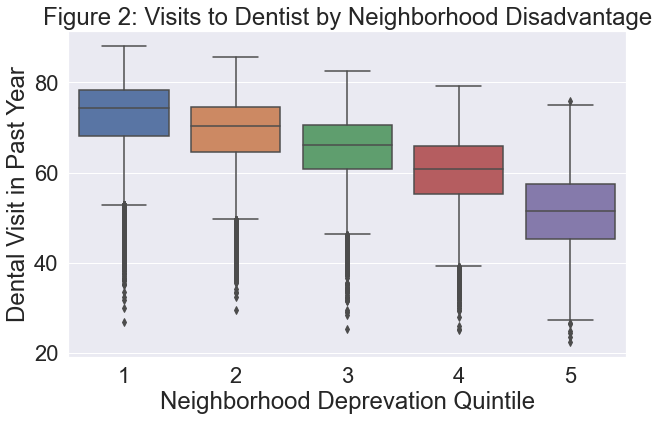

In [36]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.boxplot(x='Quintile', y='Visits to dentist or dental clinic among adults aged >=18 years', data=df)
plt.title('Figure 2: Visits to Dentist by Neighborhood Disadvantage')
plt.xlabel('Neighborhood Deprevation Quintile')
plt.ylabel('Dental Visit in Past Year')
plt.show()

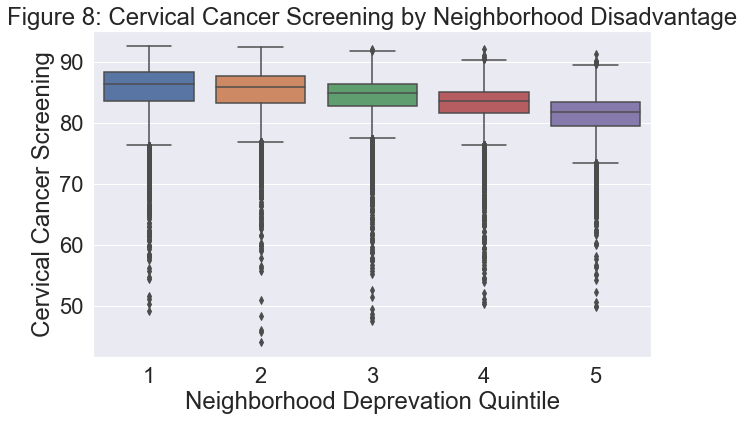

In [37]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.boxplot(x='Quintile', y='Cervical cancer screening among adult women aged 21-65 years', data=df)
plt.xlabel('Neighborhood Deprevation Quintile')
plt.ylabel('Cervical Cancer Screening')
plt.title('Figure 8: Cervical Cancer Screening by Neighborhood Disadvantage')
plt.show()

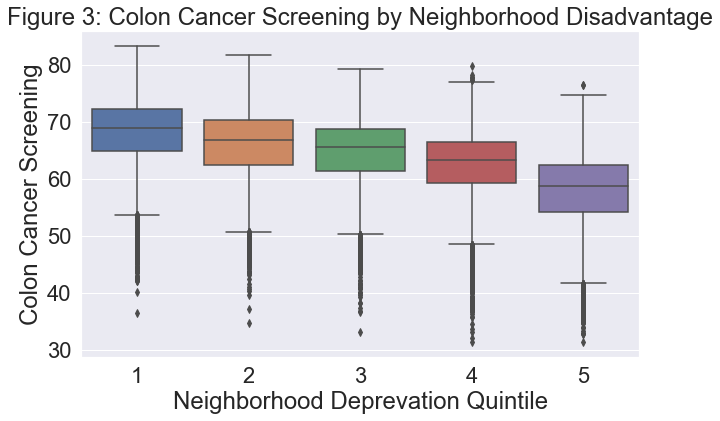

In [90]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.boxplot(x='Quintile', y='Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years', data=df)
plt.xlabel('Neighborhood Deprevation Quintile')
plt.ylabel('Colon Cancer Screening')
plt.title('Figure 3: Colon Cancer Screening by Neighborhood Disadvantage')
plt.show()

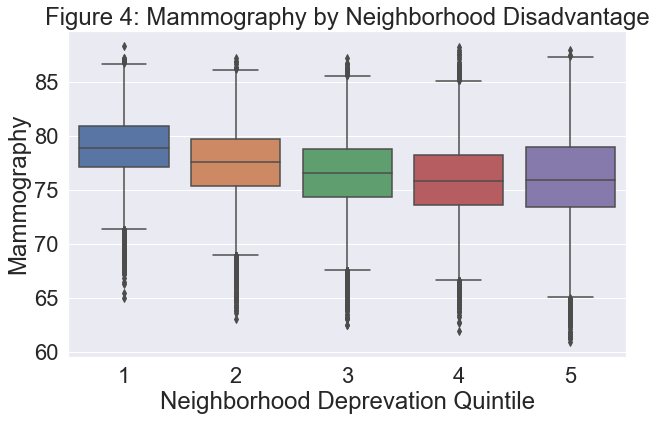

In [91]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.boxplot(x='Quintile', y='Mammography use among women aged 50-74 years', data=df)
plt.xlabel('Neighborhood Deprevation Quintile')
plt.ylabel('Mammography')
plt.title('Figure 4: Mammography by Neighborhood Disadvantage')
plt.show()

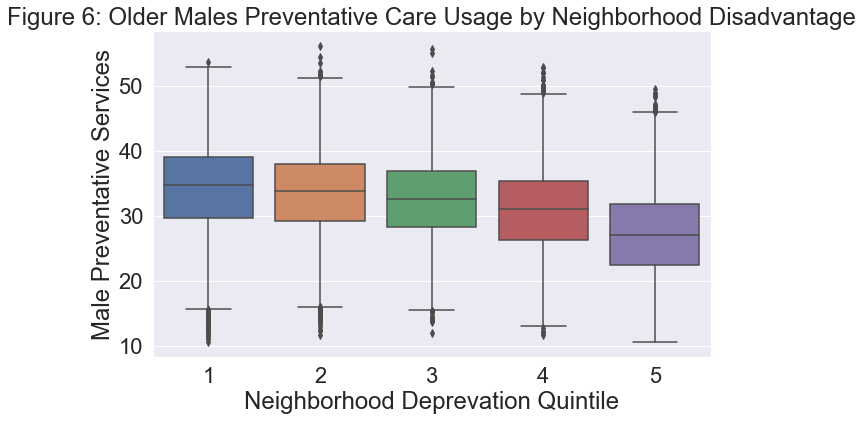

In [40]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.boxplot(x='Quintile', y='Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening', data=df)
plt.xlabel('Neighborhood Deprevation Quintile')
plt.ylabel('Male Preventative Services')
plt.title('Figure 6: Older Males Preventative Care Usage by Neighborhood Disadvantage')
plt.show()

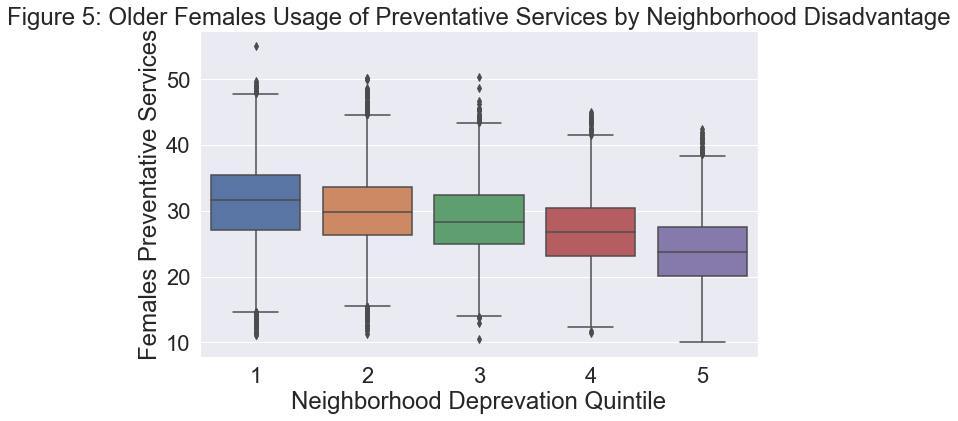

In [41]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.boxplot(x='Quintile', y='Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years', data=df)
plt.xlabel('Neighborhood Deprevation Quintile')
plt.ylabel('Females Preventative Services')
plt.title('Figure 5: Older Females Usage of Preventative Services by Neighborhood Disadvantage')
plt.show()

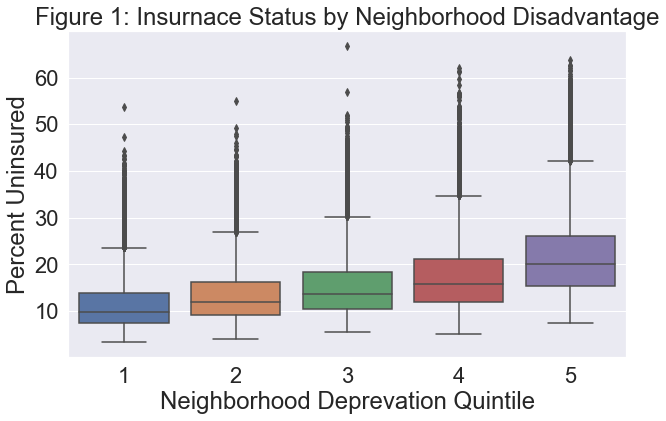

In [38]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.boxplot(x='Quintile', y='Current lack of health insurance among adults aged 18-64 years', data=df)
plt.xlabel('Neighborhood Deprevation Quintile')
plt.ylabel('Percent Uninsured')
plt.title('Figure 1: Insurnace Status by Neighborhood Disadvantage')
plt.show()

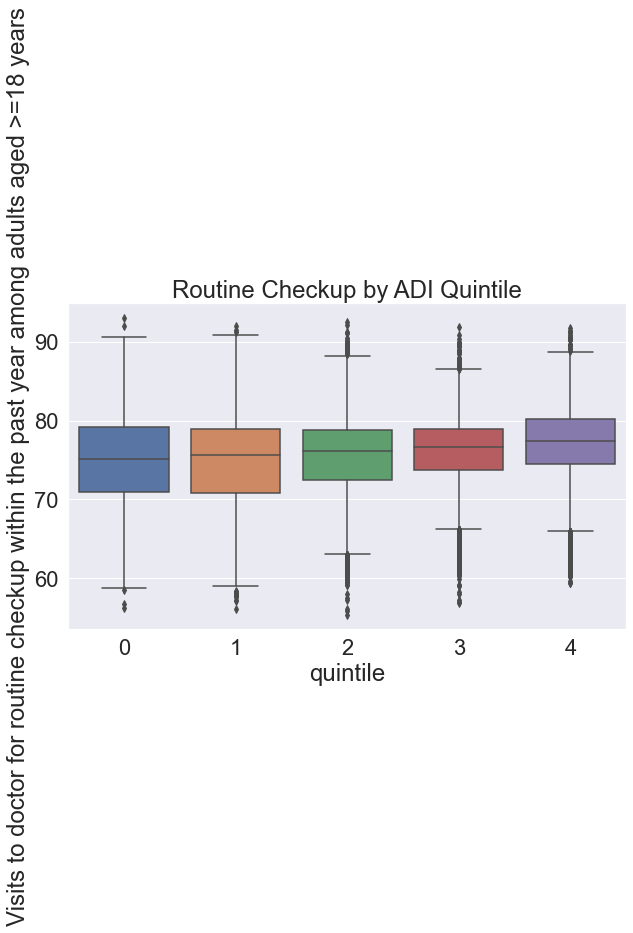

In [39]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.boxplot(x='Quintile', y='Visits to doctor for routine checkup within the past year among adults aged >=18 years', data=df)
plt.xlabel('Neighborhood Deprevation Quintile')
plt.ylabel('Visit to Doctor')
plt.title('Routine Checkup by ADI Quintile')
plt.show()

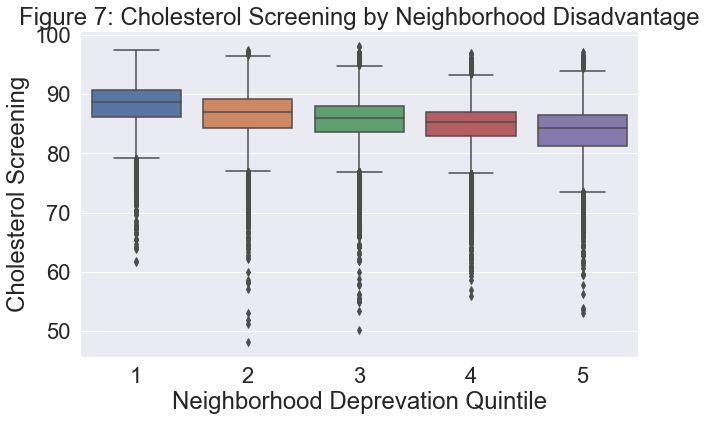

In [96]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.boxplot(x='Quintile', y='Cholesterol screening among adults aged >=18 years', data=df)
plt.xlabel('Neighborhood Deprevation Quintile')
plt.ylabel('Cholesterol Screening')
plt.title('Figure 7: Cholesterol Screening by Neighborhood Disadvantage')
plt.show()

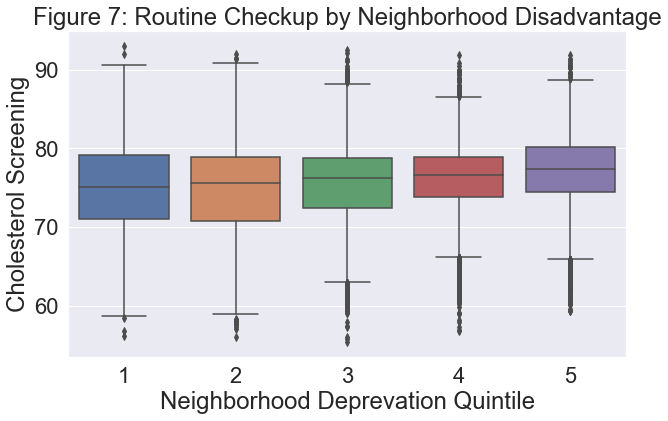

In [56]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.boxplot(x='Quintile', y='Visits to doctor for routine checkup within the past year among adults aged >=18 years', data=df)
plt.xlabel('Neighborhood Deprevation Quintile')
plt.ylabel('Cholesterol Screening')
plt.title('Figure 7: Routine Checkup by Neighborhood Disadvantage')
plt.show()

In [43]:
Visits to doctor for routine checkup within the past year among adults aged >=18 years

KeyError: 'A'